In [3]:
import logging

import pandas as pd

In [ ]:
logging.getLogger('root').setLevel('DEBUG')
logging.basicConfig(level='DEBUG')

# loading from bigquery

In [49]:
query = '''
SELECT 
    a.cell_types,
    b.gene,
    b.expression
FROM `keen-dispatch-316219.gse115978_tirosh.cell_annotations` a
join `keen-dispatch-316219.gse115978_tirosh.tpm` b TABLESAMPLE SYSTEM (1 PERCENT)
on a.cells = b.single_cell
where a.cell_types != '?'
'''

tpm_with_cell_type = pd.read_gbq(
    query
)

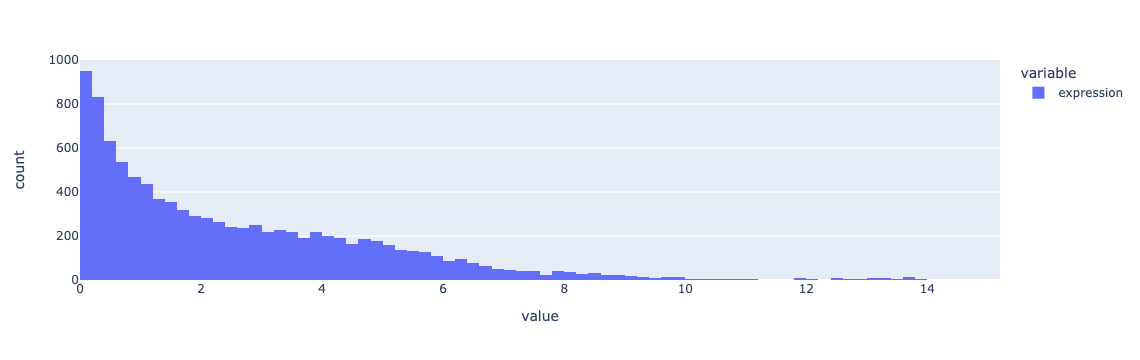

In [67]:
import plotly.express as px
fig = px.histogram(
    tpm_with_cell_type.query('expression > 0').sample(10000)['expression']
)
fig.show()

In [72]:
tpm_with_cell_type.pivot(index="gene", columns="cell_types", values="expression")

ValueError: Index contains duplicate entries, cannot reshape

# loading CSV files w pandas

In [73]:
annotations = pd.read_csv(
    "/mnt/buckets/liulab/ftp/GSE115978/GSE115978_cell.annotations.csv"
)

In [74]:
annotations

,cells,samples,cell.types,treatment.group,Cohort,no.of.genes,no.of.reads
0,cy78_CD45_neg_1_B04_S496_comb,Mel78,Mal,post.treatment,Tirosh,8258,357919
1,cy79_p4_CD45_neg_PDL1_neg_E11_S1115_comb,Mel79,Mal,treatment.naive,Tirosh,2047,5727
2,CY88_5_B10_S694_comb,Mel88,Mal,post.treatment,Tirosh,5375,139218
3,cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_F07_S67_comb,Mel79,Mal,treatment.naive,Tirosh,5648,73996
4,cy78_CD45_neg_3_H06_S762_comb,Mel78,Mal,post.treatment,Tirosh,7409,380341
...,...,...,...,...,...,...,...
7181,CY75_1_CD45_CD8_3__S168_comb_BCD8,Mel75,T.CD8,post.treatment,Tirosh,3530,137245
7182,CY75_1_CD45_CD8_8__S338_comb_BCD8,Mel75,T.CD8,post.treatment,Tirosh,3872,106432
7183,monika_D7_S132_comb_BCD8_3,Mel75,T.CD8,post.treatment,Tirosh,4589,908173
7184,CY75_1_CD45_CD8_8__S289_comb_BCD8,Mel75,T.CD8,post.treatment,Tirosh,4614,140903


In [183]:
annotations[['Cohort', 'samples']].value_counts().sort_index()

Cohort  samples 
New     Mel04.3      78
        Mel102      322
        Mel103      317
        Mel105      234
        Mel106      190
        Mel110      258
        Mel112      113
        Mel116       84
        Mel121.1    105
        Mel126       95
        Mel128       89
        Mel129pa    179
        Mel129pb     64
        Mel194      249
        Mel478      154
        Mel75       186
        Mel98       270
Tirosh  Mel53       143
        Mel58       142
        Mel60       226
        Mel71        89
        Mel72       181
        Mel74       147
        Mel75       320
        Mel78       124
        Mel79       894
        Mel80       431
        Mel81       205
        Mel82        84
        Mel84       159
        Mel88       352
        Mel89       391
        Mel94       311
dtype: int64

In [169]:
tpm = pd.read_csv(
    "/mnt/buckets/liulab/ftp/GSE115978/GSE115978_tpm.csv",
    index_col=0,
#     skiprows=lambda i: i % 100
)

In [180]:
tpm.astype(bool).mean(axis=0).sort_values()

cy105_CD45neg_S251                          0.072068
MGH00478_CD45pos_2_S348                     0.072152
cy106_CD45neg_CD90neg_S363_19               0.072279
cy103_CD45neg_CD90neg_S157                  0.072321
cy129PA_CD45neg_CD90neg_S141                0.072743
                                              ...   
cy80_Cd45_pos_PD1_pos_S192_H12_S192_comb    0.535591
Cy81_Bulk_CD45_D09_S141_comb                0.542303
Cy81_Bulk_CD45_C09_S129_comb                0.560500
cy110_CD45neg_CD90neg_S282                  0.573081
cy128_CD45neg_S275                          0.578021
Length: 7186, dtype: float64

In [170]:
genes = "EPT1	MIR101-2	MIR548AU	HOXB5	ENKUR	LYZL6	CATSPER2P1	LINC00320	MRPL46	SPINK4".split('\t')
genes

['EPT1',
 'MIR101-2',
 'MIR548AU',
 'HOXB5',
 'ENKUR',
 'LYZL6',
 'CATSPER2P1',
 'LINC00320',
 'MRPL46',
 'SPINK4']

In [171]:
tpm.loc[genes].T

,EPT1,MIR101-2,MIR548AU,HOXB5,ENKUR,LYZL6,CATSPER2P1,LINC00320,MRPL46,SPINK4
cy78_CD45_neg_1_B04_S496_comb,0.348232,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,2.392317,0.0
cy79_p4_CD45_neg_PDL1_neg_E11_S1115_comb,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
CY88_5_B10_S694_comb,0.214125,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_F07_S67_comb,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,4.037206,0.0
cy78_CD45_neg_3_H06_S762_comb,1.723777,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
CY75_1_CD45_CD8_3__S168_comb_BCD8,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.899949,0.000000,0.0
CY75_1_CD45_CD8_8__S338_comb_BCD8,0.000000,0.0,0.0,0.0,0.000000,0.0,1.539531,0.000000,0.000000,0.0
monika_D7_S132_comb_BCD8_3,0.044044,0.0,0.0,0.0,0.000000,0.0,0.424385,0.000000,0.000000,0.0
CY75_1_CD45_CD8_8__S289_comb_BCD8,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0


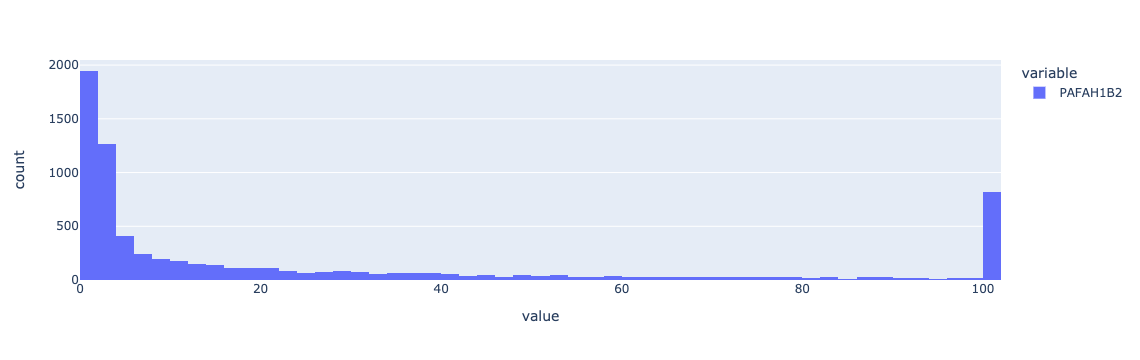

In [162]:
import math

import plotly.express as px

fig = px.histogram(
#     np.power(math.e, tpm.loc['RPS11'].T).clip(upper=math.e**9)
    tpm.loc['PAFAH1B2'].T.apply(np.exp).clip(upper=100)
)

fig.show()

In [172]:
tpm_formatted = tpm\
.rename(columns=lambda sc_name: annotations.loc[annotations['cells'] == sc_name, 'cell.types'].iloc[0])\
.apply(np.exp) - 1
tpm_formatted *= 100_000 / tpm_formatted.sum()

In [173]:
tpm_formatted

,Mal,Mal,Mal,Mal,Mal,Mal,Mal,Mal,Mal,Mal,...,T.CD4,T.CD8,T.CD8,T.CD8,T.CD8,T.CD8,T.CD8,T.CD8,T.CD8,T.CD8
C9orf152,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RPS11,197.728863,19.951747,31.264641,31.786578,187.710284,16.673549,4.582770,88.262304,2.208798,583.668309,...,154.551981,21.633958,0.000000,14.631615,4.163078,31.230179,71.654536,31.940350,0.000000,10.730631
ELMO2,0.746874,0.000000,0.024147,3.017990,0.804590,0.285872,0.292259,0.006100,0.000000,0.409206,...,0.177999,0.000000,0.134897,0.000000,22.832774,0.000000,0.000000,0.000000,0.000000,41.471645
CREB3L1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PNMA1,2.166986,0.000000,0.015867,1.544112,3.963246,1.026778,0.000000,0.698053,0.000000,10.563881,...,0.000000,0.211649,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PIK3IP1,0.089106,17.103359,0.000000,0.000000,0.429362,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,12.515935,0.000000,0.316136,0.000000,0.000000,7.842334
SNRPD2,12.344695,0.000000,5.120950,39.670468,24.646314,6.545281,4.627043,3.134439,6.147716,25.523731,...,9.681188,0.000000,12.914832,3.962920,21.091896,72.986891,0.000000,0.000000,3.208132,43.691154
SLC39A6,1.542048,0.000000,0.060377,2.529327,3.027593,0.322771,0.000000,0.755821,5.063927,0.000000,...,0.000000,8.063166,9.132293,22.529944,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CTSC,0.725542,0.000000,0.214985,0.153901,0.382574,0.086962,0.031423,0.239096,0.111559,0.292199,...,0.247792,44.454575,2.128908,0.000000,0.013044,78.997592,0.484740,0.756191,50.462969,1.824356


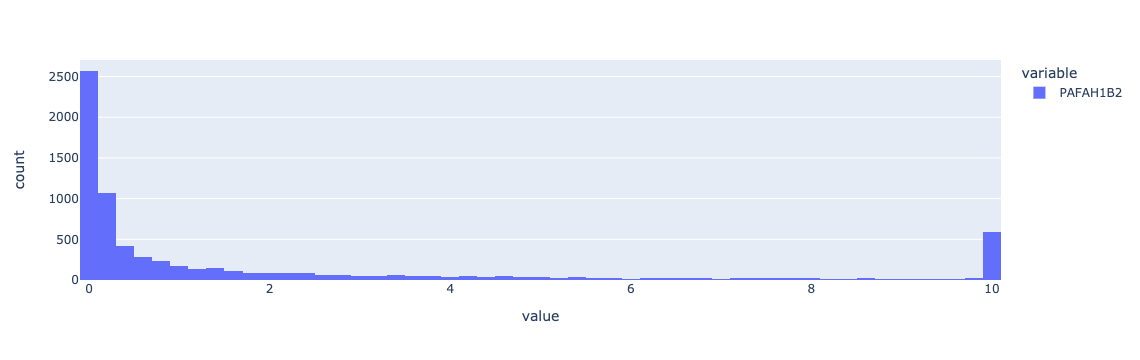

In [176]:
fig = px.histogram(
    tpm_formatted.loc['PAFAH1B2'].T.clip(upper=10)
)

fig.show()

In [88]:
tpm_formatted.sum()

Mal      3560.404093
Mal       389.587880
Mal      1541.989451
Mal       511.162967
Mal      3076.226784
            ...     
T.CD8     403.330494
T.CD8     822.398771
T.CD8     914.363146
T.CD8      83.383726
T.CD8     621.706313
Length: 7186, dtype: float64

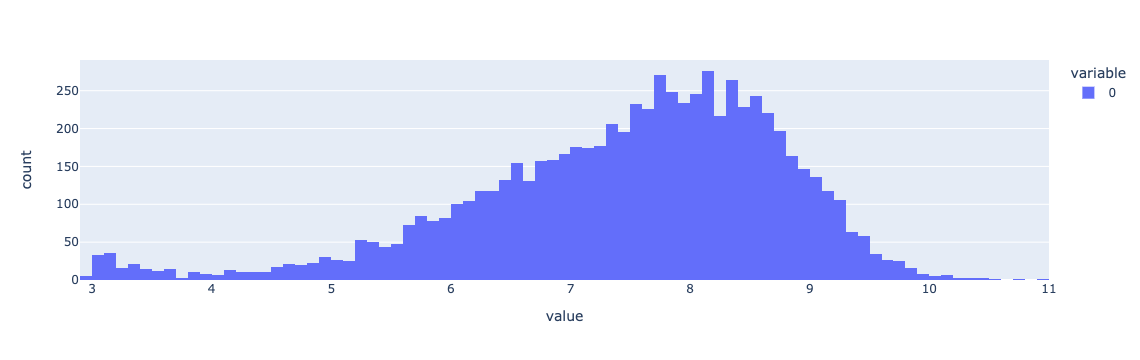

In [91]:
import plotly.express as px

fig = px.histogram(
    tpm_formatted.sum().apply(np.log),
)

fig.show()
